In [1]:
import pandas as pd
import numpy as np

transaction = pd.read_excel("QVI_transaction_data.xlsx", sheet_name = "in")
customer = pd.read_csv("QVI_purchase_behaviour.csv")

print(transaction.head())
print(customer.head())

print(transaction.dtypes)
print(customer.dtypes)

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [2]:
transaction["DATE"] = pd.to_datetime(transaction["DATE"], origin="1899-12-30", unit="D")
customer["LIFESTAGE"] = customer["LIFESTAGE"].astype("category")
customer["PREMIUM_CUSTOMER"] = customer["PREMIUM_CUSTOMER"].astype("category")

In [3]:
transaction = transaction[~transaction['PROD_NAME'].str.contains("salsa", case=False, na=False)]

In [5]:
import re

transaction["PACK_SIZE"] = transaction["PROD_NAME"].apply(lambda x: int(re.search(r'(\d+)g', str(x)).group(1)) if re.search(r'(\d+)g', str(x)) else None)
print(transaction["PACK_SIZE"].isnull().sum())
transaction = transaction.dropna(subset=["PACK_SIZE"])

6064


In [11]:
import numpy as np

transaction["BRAND_UPPER"] = transaction["BRAND"].str.upper()

conditions = [
    transaction["BRAND_UPPER"].str.contains("SMITH"),
    transaction["BRAND_UPPER"].str.contains("WOOLWORTH"),
    transaction["BRAND_UPPER"].str.contains("RRD"),
    transaction["BRAND_UPPER"].str.contains("INFUZION"),
    transaction["BRAND_UPPER"].str.contains("KETTLE"),
    transaction["BRAND_UPPER"].str.contains("DORITO"),
    transaction["BRAND_UPPER"].str.contains("GRN"),
    transaction["BRAND_UPPER"].str.contains("NATURAL"),
    transaction["BRAND_UPPER"].str.contains("TWIST"),
    transaction["BRAND_UPPER"].str.contains("THIN"),
    transaction["BRAND_UPPER"].str.contains("CHEEZ"),
    transaction["BRAND_UPPER"].str.contains("TYRREL"),
    transaction["BRAND_UPPER"].str.contains("COBS"),
    transaction["BRAND_UPPER"].str.contains("FRENCH"),
    transaction["BRAND_UPPER"].str.contains("TOSTITO"),
    transaction["BRAND_UPPER"].str.contains("CHEETOS"),
    transaction["BRAND_UPPER"].str.contains("BURGER"),
    transaction["BRAND_UPPER"].str.contains("SUNBITES"),
    transaction["BRAND_UPPER"].str.contains("CCS")
]

choices = [
    "SMITHS", "WOOLWORTHS", "RRD", "INFUZIONS", "KETTLE", "DORITOS",
    "GRNWVES", "NATURAL", "TWISTIES", "THINS", "CHEEZELS", "TYRRELLS",
    "COBS", "FRENCH", "TOSTITOS", "CHEETOS", "BURGER", "SUNBITES", "CCS"
]

transaction["STANDARD_BRAND"] = np.select(conditions, choices, default=transaction["BRAND"])

transaction.drop(columns=["BRAND_UPPER"], inplace=True)
print(sorted(transaction["STANDARD_BRAND"].unique()))

['BURGER', 'CCS', 'CHEETOS', 'CHEEZELS', 'COBS', 'DORITOS', 'FRENCH', 'GRNWVES', 'INFUZIONS', 'KETTLE', 'NATURAL', 'PRINGLES', 'RRD', 'SMITHS', 'SUNBITES', 'THINS', 'TOSTITOS', 'TWISTIES', 'TYRRELLS', 'WOOLWORTHS']


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
BRAND             0
STANDARD_BRAND    0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


<Axes: >

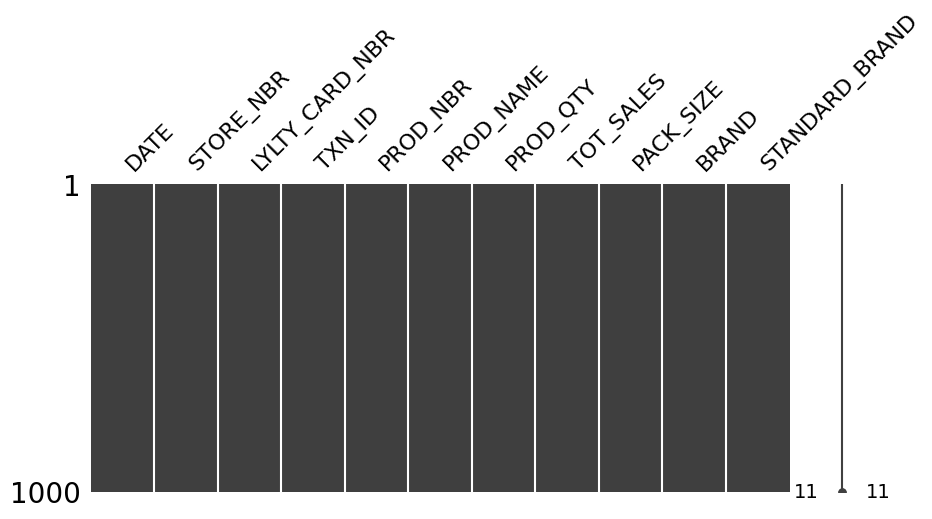

In [19]:
print(transaction.isnull().sum())
print(customer.isnull().sum())
import missingno as msno
msno.matrix(transaction.sample(1000), figsize=(10, 4))

In [20]:
print(transaction.duplicated().sum())
print(customer.duplicated().sum())
transaction.drop_duplicates(inplace=True)
customer.drop_duplicates(inplace=True)

0
0


In [21]:
print(transaction.dtypes)
print(customer.dtypes)

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
PACK_SIZE                float64
BRAND                     object
STANDARD_BRAND            object
dtype: object
LYLTY_CARD_NBR         int64
LIFESTAGE           category
PREMIUM_CUSTOMER    category
dtype: object


In [22]:
print(transaction.head())
print(customer.head())

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  2018-10-17          1            1000       1         5   
2  2019-05-20          1            1343     383        61   
12 2019-05-18          9            9208    8634        15   
24 2018-08-15         38           38142   34181       108   
26 2018-08-19         39           39167   35638       111   

                                   PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0     Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
2     Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
12                  Twisties Cheese     270g         2        9.2      270.0   
24  Kettle Tortilla ChpsHny&Jlpno Chili 150g         2        9.2      150.0   
26     Smiths Chip Thinly  Cut Original 175g         2        6.0      175.0   

       BRAND STANDARD_BRAND  
0    NATURAL        NATURAL  
2     SMITHS         SMITHS  
12  TWISTIES       TWISTIES  
24    KETTLE         KETTL

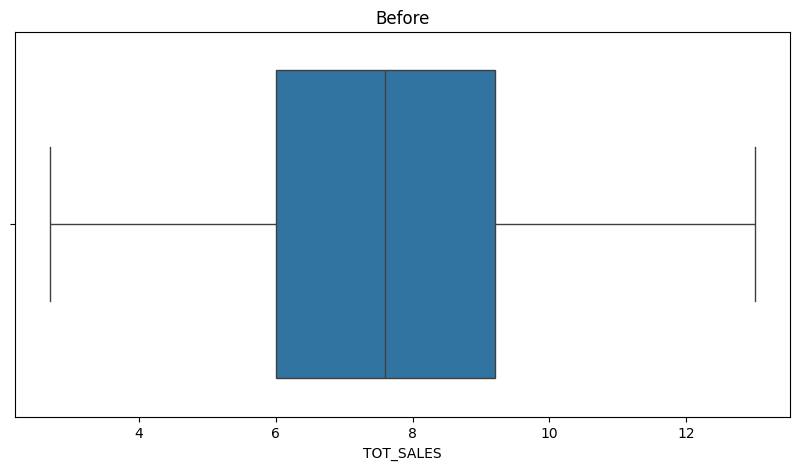

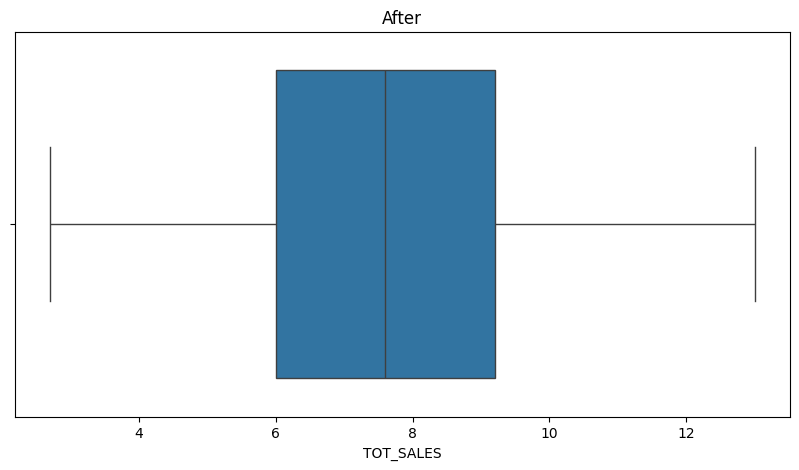

In [32]:
Q1_qty = transaction["PROD_QTY"].quantile(0.25)
Q3_qty = transaction["PROD_QTY"].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

filtered = transaction[(transaction["PROD_QTY"] >= Q1_qty - 1.5 * IQR_qty) & (transaction["PROD_QTY"] <= Q3_qty + 1.5 * IQR_qty)]

Q1_sales = filtered["TOT_SALES"].quantile(0.25)
Q3_sales = filtered["TOT_SALES"].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

filtered = filtered[(filtered["TOT_SALES"] >= Q1_sales - 1.5 * IQR_sales) & (filtered["TOT_SALES"] <= Q3_sales + 1.5 * IQR_sales)]

plt.figure(figsize=(10, 5))
sns.boxplot(x='TOT_SALES', data=transaction)
plt.title("Before")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='TOT_SALES', data=filtered)
plt.title("After")
plt.show()

In [33]:
merged_data = pd.merge(transaction, customer, on="LYLTY_CARD_NBR", how="inner")
print(merged_data.head())
merged_data.to_csv('merged_data.csv', index=False)

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-20          1            1343     383        61   
2 2019-05-18          9            9208    8634        15   
3 2018-12-28          9            9208    8633        24   
4 2018-08-15         38           38142   34181       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
2                  Twisties Cheese     270g         2        9.2      270.0   
3     Grain Waves         Sweet Chilli 210g         2        7.2      210.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         2        9.2      150.0   

      BRAND STANDARD_BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0   NATURAL        NATURAL   YOUNG SINGLES/COUPLES          Premium  
1    SMITHS       

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('merged_data.csv')

df['total_sales'] = df['TOT_SALES']
descriptive_stats = df['total_sales'].describe()
print(descriptive_stats)

sales_by_product = df.groupby('PROD_NBR')['total_sales'].sum().reset_index()
sales_by_lifestage = df.groupby('LIFESTAGE')['total_sales'].sum().reset_index()
sales_by_premium_customer = df.groupby('PREMIUM_CUSTOMER')['total_sales'].sum().reset_index()
sales_by_store = df.groupby('STORE_NBR')['total_sales'].sum().reset_index()

grouped = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
avg_units = (grouped['PROD_QTY'].sum() / grouped['LYLTY_CARD_NBR'].nunique()).reset_index(name='AVG_UNITS')
avg_price = (grouped['total_sales'].sum() / grouped['PROD_QTY'].sum()).reset_index(name='AVG_PRICE')

print(sales_by_product.head())
print(sales_by_lifestage.head())
print(sales_by_premium_customer.head())
print(avg_units.head())
print(avg_price.head())

count    214669.000000
mean          7.720588
std           2.167514
min           2.700000
25%           6.000000
50%           7.600000
75%           9.200000
max          13.000000
Name: total_sales, dtype: float64
   PROD_NBR  total_sales
0         1       7464.6
1         2      21538.4
2         3      26661.6
3         4      37232.0
4         5       7644.0
                LIFESTAGE  total_sales
0  MIDAGE SINGLES/COUPLES     158070.6
1            NEW FAMILIES      42759.3
2          OLDER FAMILIES     306884.3
3   OLDER SINGLES/COUPLES     346726.2
4                RETIREES     312735.5
  PREMIUM_CUSTOMER  total_sales
0           Budget     581146.7
1       Mainstream     642118.4
2          Premium     434105.8
                LIFESTAGE PREMIUM_CUSTOMER  AVG_UNITS
0  MIDAGE SINGLES/COUPLES           Budget   6.575387
1  MIDAGE SINGLES/COUPLES       Mainstream   6.701379
2  MIDAGE SINGLES/COUPLES          Premium   6.579798
3            NEW FAMILIES           Budget   5.159868


C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\3516223824.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='total_sales', y='PROD_NBR', palette='Blues_d')


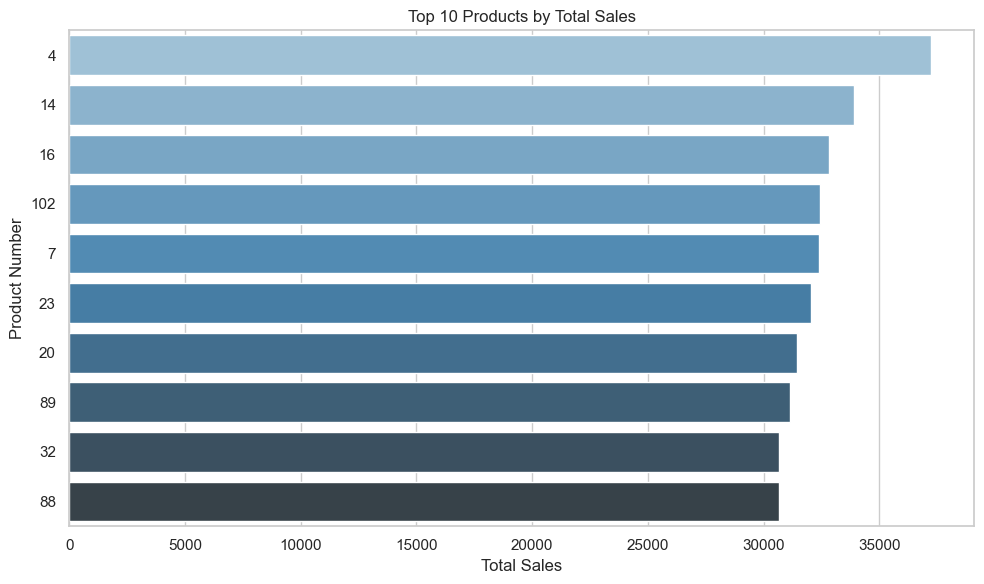

In [50]:
merged_data['total_sales'] = merged_data['TOT_SALES']
sns.set(style='whitegrid')
top_products = (
    merged_data.groupby('PROD_NBR')['total_sales'].sum()
    .nlargest(10).reset_index()
)
top_products['PROD_NBR'] = top_products['PROD_NBR'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='total_sales', y='PROD_NBR', palette='Blues_d')
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Number")
plt.tight_layout()
plt.show()

C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\1462715001.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby('LIFESTAGE')['total_sales'].sum()
C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\1462715001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_lifestage, x='LIFESTAGE', y='total_sales', palette='Set2')


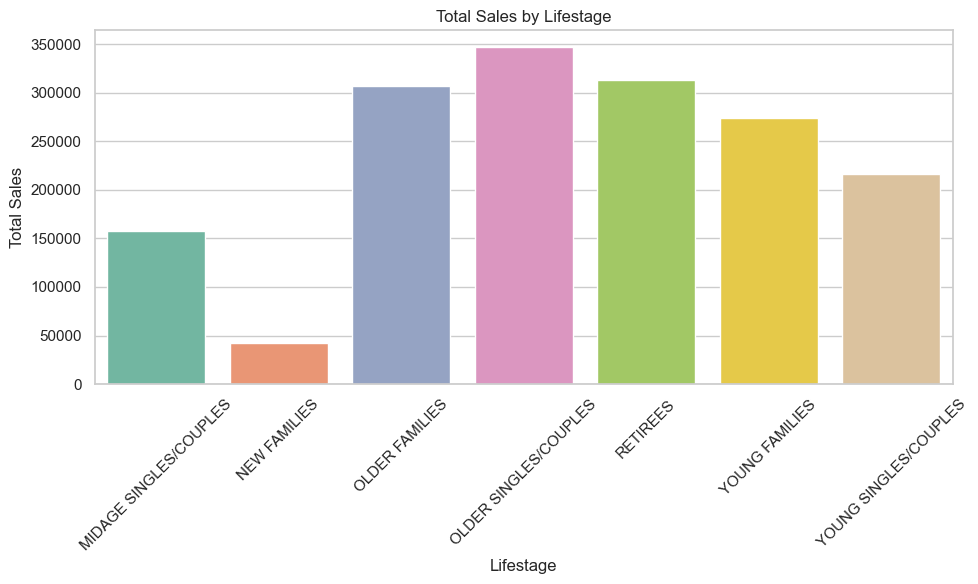

In [51]:
sales_by_lifestage = (
    merged_data.groupby('LIFESTAGE')['total_sales'].sum()
    .sort_values(ascending=False).reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_lifestage, x='LIFESTAGE', y='total_sales', palette='Set2')
plt.title("Total Sales by Lifestage")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\2624295015.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby('PREMIUM_CUSTOMER')['total_sales'].sum()
C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\2624295015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_premium, x='PREMIUM_CUSTOMER', y='total_sales', palette='pastel')


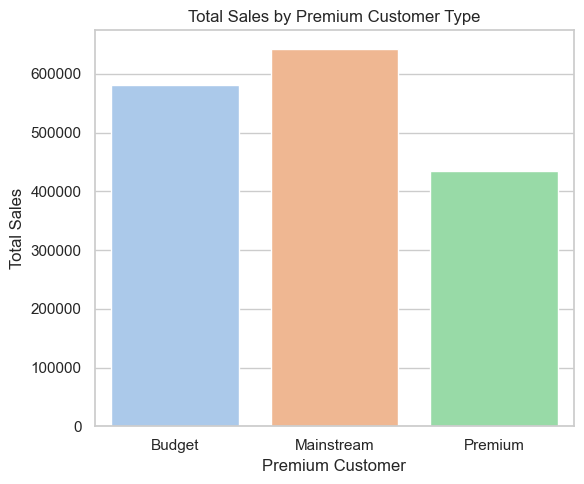

In [52]:
sales_by_premium = (
    merged_data.groupby('PREMIUM_CUSTOMER')['total_sales'].sum()
    .reset_index()
)
plt.figure(figsize=(6, 5))
sns.barplot(data=sales_by_premium, x='PREMIUM_CUSTOMER', y='total_sales', palette='pastel')
plt.title("Total Sales by Premium Customer Type")
plt.xlabel("Premium Customer")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\1934759592.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() /
C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\1934759592.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()


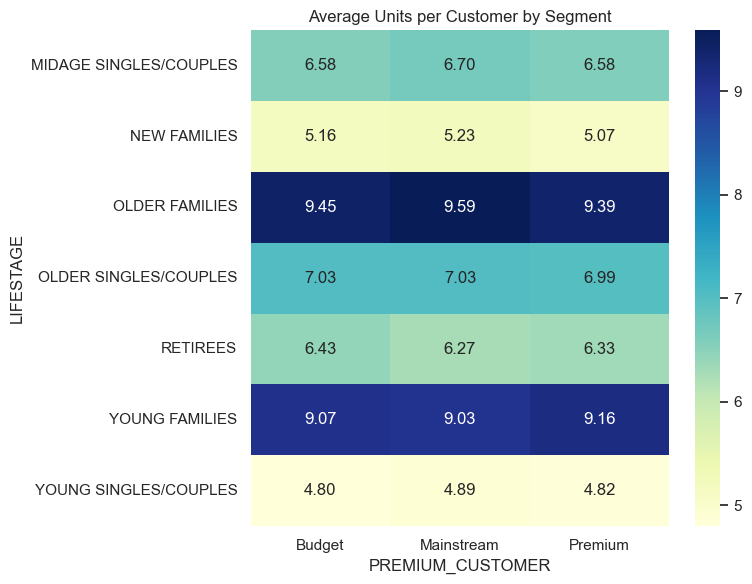

In [53]:
avg_units = (
    merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() /
    merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
).reset_index(name='AVG_UNITS')

pivot_units = avg_units.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='AVG_UNITS')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_units, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average Units per Customer by Segment")
plt.tight_layout()
plt.show()

C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\2796725110.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['total_sales'].sum() /
C:\Users\vghy0\AppData\Local\Temp\ipykernel_8508\2796725110.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()


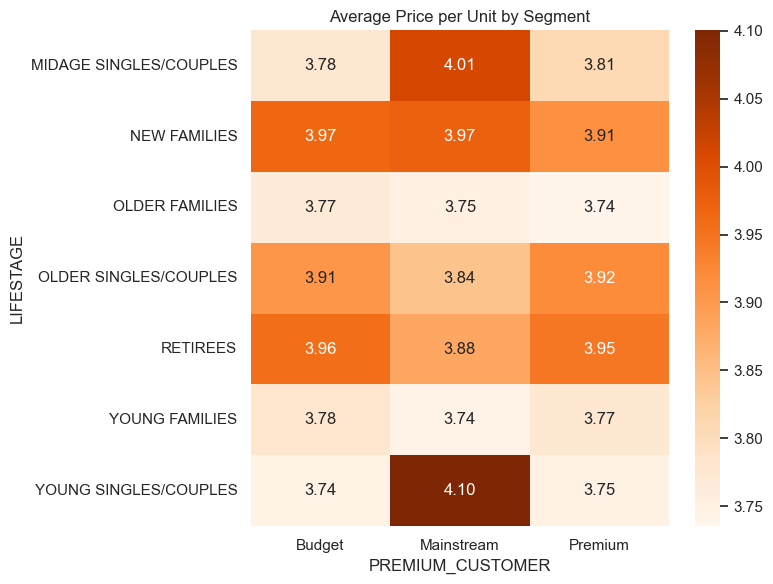

In [54]:
avg_price = (
    merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['total_sales'].sum() /
    merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
).reset_index(name='AVG_PRICE')

pivot_price = avg_price.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='AVG_PRICE')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_price, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Average Price per Unit by Segment")
plt.tight_layout()
plt.show()

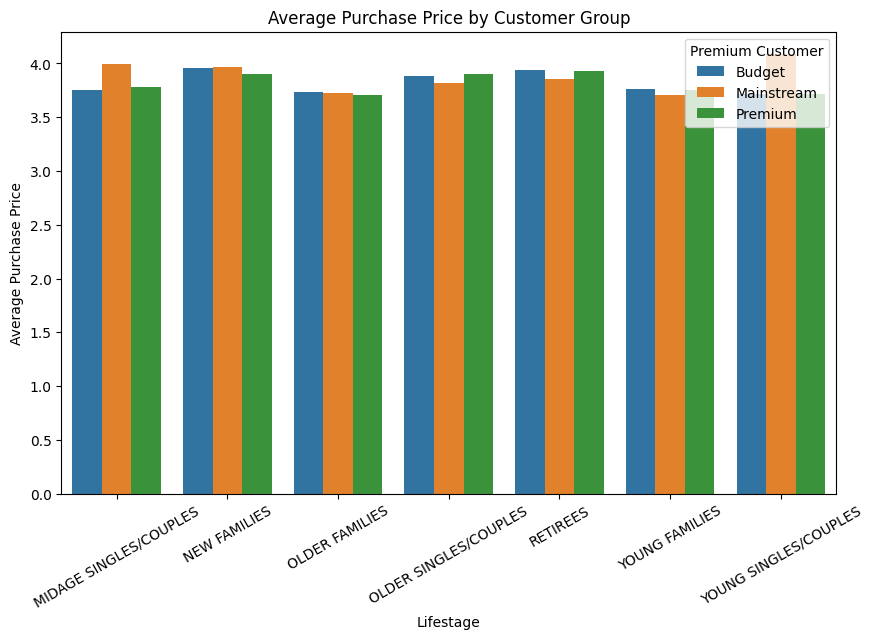

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='AVG_PRICE', hue='PREMIUM_CUSTOMER')
plt.title('Average Purchase Price by Customer Group')
plt.xlabel('Lifestage')
plt.ylabel('Average Purchase Price')
plt.xticks(rotation=30)
plt.legend(title='Premium Customer')
plt.show()